1. Как применить законы статистики к данным ? Сколько элементов сумм использовано в коде?

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import seaborn as sns

15


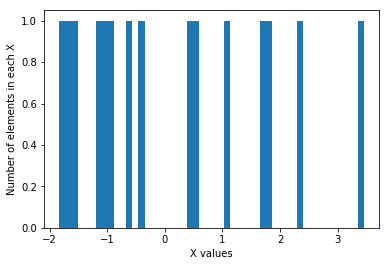

In [117]:
#чем больше установить number_of_sums, тем ближе построенное распределение будет к нормальному (согласно Центральной предельной теореме)
#чтобы узнать number_of_sums надо просуммировать Number of elements in each X для каждого X, по графику получается number_of_sums=15. Можно поставить счетчик s в цикл.
number_of_sums = 15
number_of_randoms = 10
s=0
X1 = np.zeros((number_of_sums, 1)) #Функция zeros() создает массив из нулей
for i in range(number_of_sums):
    X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
    s+=1
print(s)
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

2. Чему равна матрица ковариаций для графика?

In [118]:
#по графику видно, что дисперсия по X и Y выросла с 1 до 1,5, также появилась отрицательная кореляция под углом примерно -45 градусов. Эмпирически можно предположить, что C = [[1.5,-0.5],[-0.5,1.5]] 

3. Построить преобразование с помощью вычисленной выше матрицей

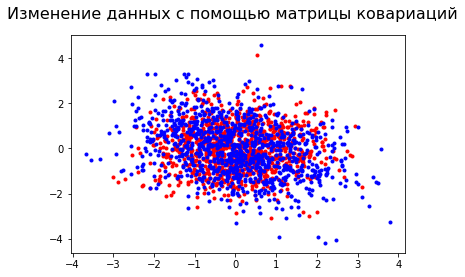

In [119]:
import numpy.linalg as la
n = 1000
C = [[1.5,-0.5],[-0.5,1.5]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

4. Посчитать угол наклона полученного распределения (визуально) в радианах и посчитать разброс данных теоритически и практически

In [120]:
#Визуально угол составляет около 135 градусов: 135° × π/180 = 2.356 рад

In [121]:
import math
print(135*math.pi/180)

2.356194490192345


In [122]:
i = 135*math.pi/180
theta = i
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = np.transpose(Y)*u                            
var_empirical = np.var(yp)
var_theoretical = np.transpose(u)*C*u
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)

генерация данных:  2.024919629472823
теоритический подсчет:  [[2.]]


5. При большом количестве данных эти показатели должны быть равны. Достаточно ли мы данных сгенерировали?

In [123]:
print(var_theoretical-var_empirical)

[[-0.02491963]]


In [9]:
#При n=1000 var_theoretical отличается от var_empirical на 2 сотых, при увеличении n до 100000 разница уменьшается до тысячных долей. Таким образом, количество генерируемых данных может определяться уровнем необходимой точности, для 5% достаточно n=10000. 

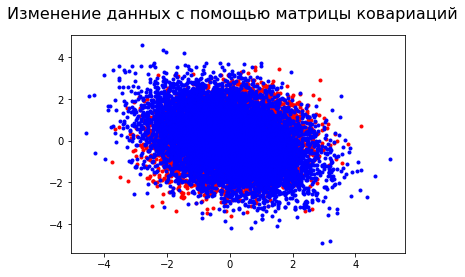

In [124]:
n1 = 10000
C = [[1.5,-0.5],[-0.5,1.5]]
A = la.cholesky(C)
X1 = np.random.randn(n1,2)
Y1 = np.dot(A,X1.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X1[:,0], X1[:,1], 'r.')
plt.plot(Y1[0,:], Y1[1,:], 'b.')

In [125]:
i = 135*math.pi/180
theta = i
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp1 = np.transpose(Y1)*u                            
var_empirical1 = np.var(yp1)
var_theoretical1 = np.transpose(u)*C*u
print('генерация данных: ', var_empirical1)
print('теоритический подсчет: ', var_theoretical1)
print(var_theoretical1-var_empirical1)

генерация данных:  1.9809819465629097
теоритический подсчет:  [[2.]]
[[0.01901805]]


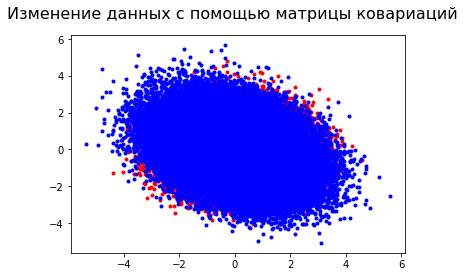

In [126]:
n2 = 100000
C = [[1.5,-0.5],[-0.5,1.5]]
A = la.cholesky(C)
X2 = np.random.randn(n2,2)
Y2 = np.dot(A,X2.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X2[:,0], X2[:,1], 'r.')
plt.plot(Y2[0,:], Y2[1,:], 'b.')

In [127]:
i = 135*math.pi/180
theta = i
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp2 = np.transpose(Y2)*u                            
var_empirical2 = np.var(yp2)
var_theoretical2 = np.transpose(u)*C*u
print('генерация данных: ', var_empirical2)
print('теоритический подсчет: ', var_theoretical2)
print(var_theoretical2-var_empirical2)

генерация данных:  1.995846893278217
теоритический подсчет:  [[2.]]
[[0.00415311]]


6. Посчитать как меняется вариация в зависимости от выбора собственного вектора.

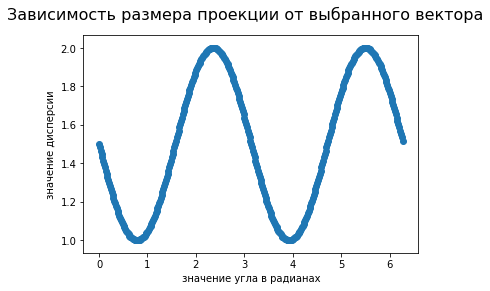

In [128]:
degrees360 = [2*math.pi/360*i for i in range(360)]
variances = []
for i in degrees360:
    theta = i
    u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
    yp = np.transpose(Y)*u
    var_empirical = np.var(yp)
    var_theoretical = np.transpose(u)*C*u
    variances.append(var_theoretical)

plt.suptitle('Зависимость размера проекции от выбранного вектора', fontsize=16)    
plt.xlabel('значение угла в радианах')
plt.ylabel('значение дисперсии')
plt.scatter(degrees360, variances)
plt.show()

7. Загрузить таблицу.

In [129]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)

In [130]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [131]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


8. Построить корелляцию для всех типов авокадо (их там три). Построить графики histograms и плотность распределения (смотрим примеры из лекций).

In [132]:
corr_matrix = df.corr()
corr_matrix

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


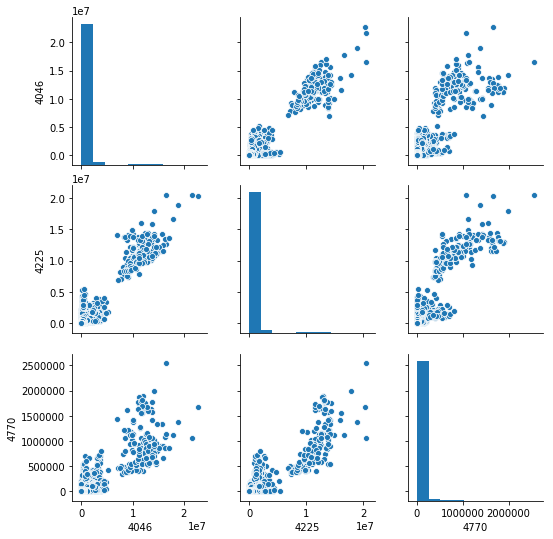

In [133]:
sns.pairplot(df, vars=['4046', '4225', '4770'], kind='scatter')

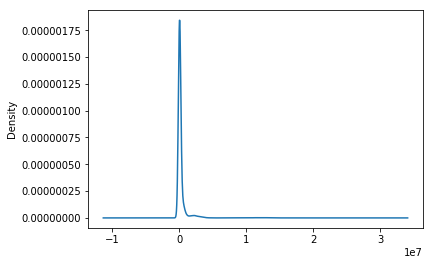

In [134]:
df['4046'].plot.kde()

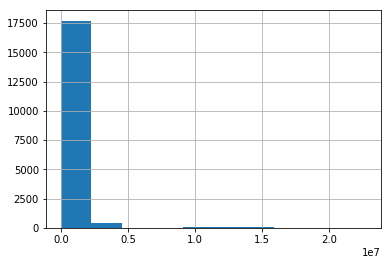

In [135]:
df['4046'].hist()

In [136]:
#Гистограмма показывает, что основное количество значений df['4046'] не превышает 2500000, вместе с тем, имеется небольшой набор данных со значениями df['4046']>8000000. Можно нарисовать отдельные гистограммы для двух наборов данных.

av_4046 = df['4046']
print(av_4046[av_4046<2500000].count())
print(av_4046[av_4046>=2500000].count())

17792
457


(array([284.,   4.,  12.,  35.,  57.,  49.,  11.,   2.,   1.,   2.]),
 array([ 2501655.4  ,  4525851.477,  6550047.554,  8574243.631,
        10598439.708, 12622635.785, 14646831.862, 16671027.939,
        18695224.016, 20719420.093, 22743616.17 ]),
 <a list of 10 Patch objects>)

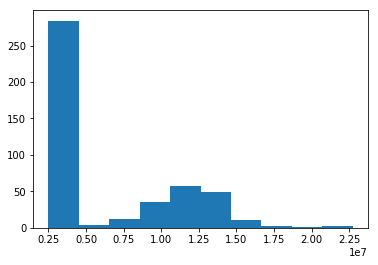

In [137]:
plt.hist(av_4046[av_4046>=2500000])

(array([15593.,   730.,   647.,   244.,   120.,    70.,    85.,    93.,
          102.,   108.]),
 array([      0.   ,  249277.358,  498554.716,  747832.074,  997109.432,
        1246386.79 , 1495664.148, 1744941.506, 1994218.864, 2243496.222,
        2492773.58 ]),
 <a list of 10 Patch objects>)

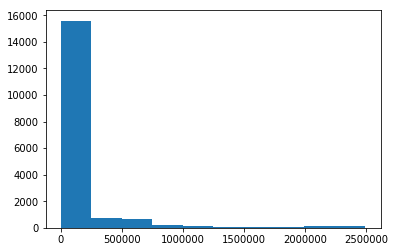

In [138]:
plt.hist(av_4046[av_4046<2500000])

(array([11337.,  1502.,  1056.,   850.,   513.,   286.,   197.,   121.,
           87.,   111.]),
 array([     0.   ,  39978.996,  79957.992, 119936.988, 159915.984,
        199894.98 , 239873.976, 279852.972, 319831.968, 359810.964,
        399789.96 ]),
 <a list of 10 Patch objects>)

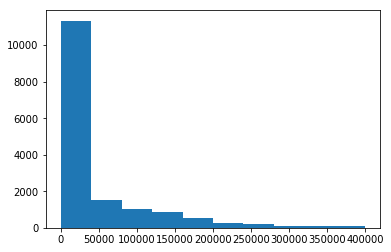

In [139]:
#При построении отдельных гистограмм для больших и малых значений df['4046'] выборки можно предположить, что значения > 5 млн. имеют нормальное распределение, значения < 400 тыс. могут быть распределены экспоненциально.
plt.hist(av_4046[av_4046<400000])

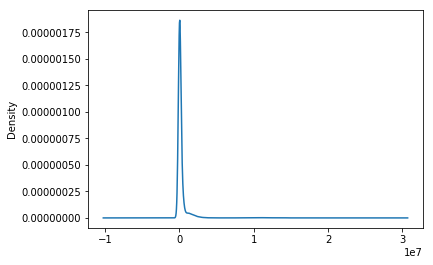

In [140]:
df['4225'].plot.kde()

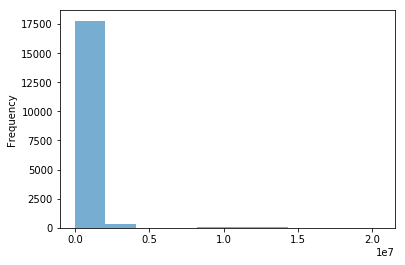

In [141]:
df['4225'].plot.hist(alpha=0.6)

In [142]:
#Аналогично гистограмма для df['4225'] показывает, что основное количество значений df['4225'] не превышает 2500000, вместе с тем, имеется небольшой набор данных со значениями df['4225']>8000000. Можно нарисовать отдельные гистограммы для двух наборов данных.

av_4225 = df['4225']
print(av_4225[av_4225<2500000].count())
print(av_4225[av_4225>=2500000].count())

17937
312


(array([139.,   4.,   7.,  22.,  58.,  47.,  27.,   3.,   1.,   4.]),
 array([ 2525304.86 ,  4319831.635,  6114358.41 ,  7908885.185,
         9703411.96 , 11497938.735, 13292465.51 , 15086992.285,
        16881519.06 , 18676045.835, 20470572.61 ]),
 <a list of 10 Patch objects>)

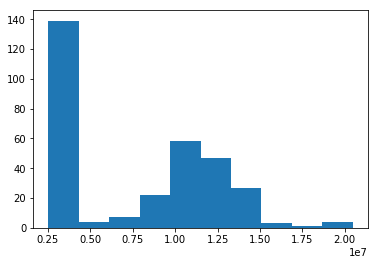

In [143]:
plt.hist(av_4225[av_4225>=2500000])

(array([14881.,  1533.,   454.,   210.,   204.,   197.,   168.,   120.,
          108.,    62.]),
 array([      0.   ,  249501.121,  499002.242,  748503.363,  998004.484,
        1247505.605, 1497006.726, 1746507.847, 1996008.968, 2245510.089,
        2495011.21 ]),
 <a list of 10 Patch objects>)

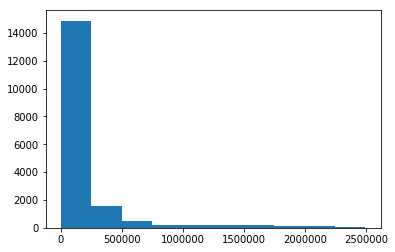

In [144]:
#Отдельные гистограммы для больших и малых значений df['4225'] дают возможности визуально сравнить их с теми же гистограммами для df['4046'] и найти общее/различия.

plt.hist(av_4225[av_4225<2500000])

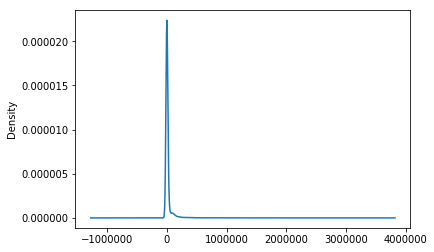

In [145]:
df['4770'].plot.kde()

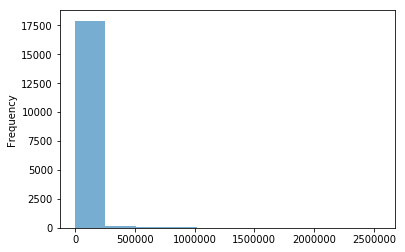

In [146]:
df['4770'].plot.hist(alpha=0.6)

In [147]:
#Гистограмма для df['4770'] показывает, что разброс значений намного меньше, чем у предыдущих величин, отдельный срез данных с большими значениями можно выделить уже для df['4770']>250000. Причем обе части ближе к экспоненцияальному распределению. 
av_4770 = df['4770']
print(av_4770[av_4770<250000].count())
print(av_4770[av_4770>=250000].count())

17896
353


(array([16174.,   615.,   215.,   269.,   226.,   144.,    93.,    66.,
           64.,    30.]),
 array([     0.   ,  24924.852,  49849.704,  74774.556,  99699.408,
        124624.26 , 149549.112, 174473.964, 199398.816, 224323.668,
        249248.52 ]),
 <a list of 10 Patch objects>)

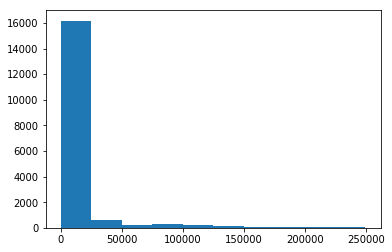

In [148]:
plt.hist(av_4770[av_4770<250000])

(array([181.,  68.,  41.,  24.,  11.,  11.,  13.,   3.,   0.,   1.]),
 array([ 250106.17 ,  479739.464,  709372.758,  939006.052, 1168639.346,
        1398272.64 , 1627905.934, 1857539.228, 2087172.522, 2316805.816,
        2546439.11 ]),
 <a list of 10 Patch objects>)

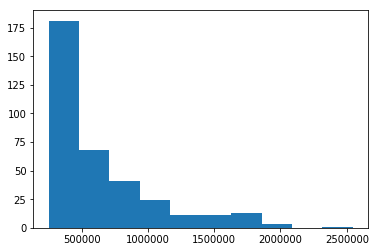

In [149]:
plt.hist(av_4770[av_4770>=250000])

9. Посчитать матрицу ковариаций. Как из нее получить собственные вектора и собственные числа?

In [150]:
corr_matrix = df.corr()
corr_matrix

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [151]:
C_4046_4225 = np.corrcoef(df['4046'],df['4225'])
print(C_4046_4225)

[[1.         0.92610996]
 [0.92610996 1.        ]]


In [152]:
import numpy.linalg as la
w,v = la.eig(C_4046_4225)
for i in range(len(w)):
    print(w[i], v[:,i])

1.9261099558992303 [0.70710678 0.70710678]
0.07389004410076971 [-0.70710678  0.70710678]


In [153]:
C_4046_4770 = np.corrcoef(df['4046'],df['4770'])
print(C_4046_4770)

[[1.        0.8333891]
 [0.8333891 1.       ]]


In [154]:
import numpy.linalg as la
w,v = la.eig(C_4046_4770)
for i in range(len(w)):
    print(w[i], v[:,i])

1.8333891041719166 [0.70710678 0.70710678]
0.16661089582808308 [-0.70710678  0.70710678]


In [155]:
C_4225_4770 = np.corrcoef(df['4225'],df['4770'])
print(C_4225_4770)

[[1.       0.887855]
 [0.887855 1.      ]]


In [156]:
import numpy.linalg as la
w,v = la.eig(C_4225_4770)
for i in range(len(w)):
    print(w[i], v[:,i])

1.8878549976059535 [0.70710678 0.70710678]
0.11214500239404646 [-0.70710678  0.70710678]


10. Линейное преобразование значений (проекция на ось)

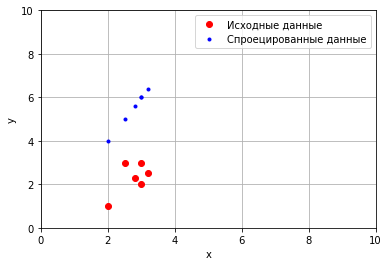

In [157]:
Xc = np.array([[2,1],[3,2],[3,3],[2.5,3],[2.8,2.3],[3.2,2.5]])
P = np.array([[1.,0.],[2.,0.]]) 
Xp = np.dot(Xc,P.T)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
plt.axis([0,10,0,10])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

11. На какую прямую проецируем?

In [158]:
# y = 2x

12. Теория вероятности
13. Напишите код для моделирования 100 подбрасываний игрального кубика. Начертите диаграму histogram.

In [159]:
import random
variances = []
for i in range(100):
    dice = random.choice(['1', '2', '3', '4', '5', '6'])
    variances.append(dice)
print(variances)

['5', '1', '1', '3', '4', '6', '4', '4', '3', '4', '4', '1', '2', '2', '3', '1', '2', '6', '5', '1', '5', '6', '4', '5', '4', '2', '3', '5', '3', '4', '5', '3', '2', '2', '5', '2', '6', '5', '3', '6', '5', '4', '2', '2', '6', '2', '6', '4', '6', '3', '2', '1', '3', '4', '6', '1', '3', '2', '1', '4', '2', '1', '4', '2', '4', '4', '5', '1', '4', '3', '3', '4', '2', '5', '1', '2', '1', '5', '2', '6', '3', '5', '2', '1', '3', '5', '6', '2', '1', '6', '2', '3', '2', '4', '2', '4', '6', '3', '3', '3']


In [160]:
df_dice = pd.DataFrame.from_records(variances)
df_dice.columns = ['dice']
df_dice['dice'] = df_dice.dice.astype('int64')
df_dice.head()

,dice
0,5
1,1
2,1
3,3
4,4


In [161]:
df_dice['dice'].value_counts()

2    22
4    19
3    18
5    14
1    14
6    13
Name: dice, dtype: int64

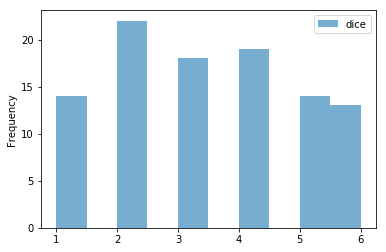

In [162]:
df_dice.plot.hist(alpha=0.6)